In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:

def plot_models_optimizers(
        df: pd.DataFrame, df_name: str,
        x_axis: str, y_axis: str,
        x_unit: str = None,
        y_unit: str = None
        ) -> None:

    optimizer_names = df["optimizer_name"].unique()
    model_names = df["model_name"].unique()
    print(model_names)

    model_styles = {
        "Binary": {"linestyle": "--", "marker": "o"},
        "Classic": {"linestyle": "-", "marker": "x"}
        }

    optimizer_colors = {
        "adam": "red",
        "adamax": "blue",
        "adadelta": "green"
    }

    plt.figure(figsize=(12, 8))

    for optimizer_name in optimizer_names:
        for model_name in model_names:
            df_filtered = df[
                (df["optimizer_name"] == optimizer_name) &
                (df["model_name"] == model_name)
                ]

            if not df_filtered.empty:
                style = model_styles.get(
                    model_name,
                    {"linestyle": "-", "marker": ""}
                    )

                color = optimizer_colors.get(optimizer_name, "black")
                plt.plot(
                    df_filtered[x_axis],
                    df_filtered[y_axis],
                    label=f"{model_name} ({optimizer_name})",
                    linestyle=style["linestyle"],
                    marker=style["marker"],
                    color=color
                    )

    title = f"{df_name}\n{y_axis} on Models "
    title += f"with Different Optimizers Over {x_axis}"
    plt.title(title)

    if x_unit is None:
        plt.xlabel(x_axis.title())
    else:
        plt.xlabel(f"{x_axis.title()} {x_unit}")

    if y_unit is None:
        plt.ylabel(y_axis.title())
    else:
        plt.ylabel(f"{y_axis.title()} {y_unit}")

    plt.legend(
        title="Model (Optimizer)",
        bbox_to_anchor=(1.05, 1),
        loc="upper left"
        )

    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [7]:
df = pd.read_csv("./training_results_larq.csv")
df['model_name'].replace({'Dense_MNIST': 'Binary'}, inplace=True)
df = df.rename(columns={"test_acc": "Test Accuracy"})
df = df.rename(columns={"train_acc": "Train Accuracy"})
df = df.rename(columns={"train_loss": "Train loss"})
df = df.rename(columns={"test_loss": "Test loss"})
df = df.rename(columns={"epoch_time": "Epoch time"})

df.head()


/tmp/ipykernel_104252/4274508140.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['model_name'].replace({'Dense_MNIST': 'Binary'}, inplace=True)


,model_name,optimizer_name,epoch,Train loss,Train Accuracy,Test loss,Test Accuracy,epoch_train_time,epoch_test_time
0,Binary,adam,1,1.161234,0.705967,0.810820,0.8382,6.787130,0.324714
1,Binary,adam,2,0.838800,0.832650,0.717511,0.8688,5.415450,0.346955
2,Binary,adam,3,0.773785,0.849633,0.703704,0.8778,5.548305,0.345918
3,Binary,adam,4,0.750679,0.857617,0.660644,0.8801,5.416394,0.358200
4,Binary,adam,5,0.728451,0.861133,0.657110,0.8839,5.607167,0.363283


In [8]:
df_bin = df

In [9]:
df = pd.read_csv("./training_results_larq.csv")
df['model_name'].replace({'Dense_MNIST': 'Classic'}, inplace=True)
df = df.rename(columns={"test_acc": "Test Accuracy"})
df = df.rename(columns={"train_acc": "Train Accuracy"})
df = df.rename(columns={"train_loss": "Train loss"})
df = df.rename(columns={"test_loss": "Test loss"})
df = df.rename(columns={"epoch_time": "Epoch time"})

classic_df = df
classic_df.head()

/tmp/ipykernel_104252/1719305686.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['model_name'].replace({'Dense_MNIST': 'Classic'}, inplace=True)


,model_name,optimizer_name,epoch,Train loss,Train Accuracy,Test loss,Test Accuracy,epoch_train_time,epoch_test_time
0,Classic,adam,1,1.161234,0.705967,0.810820,0.8382,6.787130,0.324714
1,Classic,adam,2,0.838800,0.832650,0.717511,0.8688,5.415450,0.346955
2,Classic,adam,3,0.773785,0.849633,0.703704,0.8778,5.548305,0.345918
3,Classic,adam,4,0.750679,0.857617,0.660644,0.8801,5.416394,0.358200
4,Classic,adam,5,0.728451,0.861133,0.657110,0.8839,5.607167,0.363283


In [10]:
df = pd.concat([classic_df, df_bin])

In [11]:
df

,model_name,optimizer_name,epoch,Train loss,Train Accuracy,Test loss,Test Accuracy,epoch_train_time,epoch_test_time
0,Classic,adam,1,1.161234,0.705967,0.810820,0.8382,6.787130,0.324714
1,Classic,adam,2,0.838800,0.832650,0.717511,0.8688,5.415450,0.346955
2,Classic,adam,3,0.773785,0.849633,0.703704,0.8778,5.548305,0.345918
3,Classic,adam,4,0.750679,0.857617,0.660644,0.8801,5.416394,0.358200
4,Classic,adam,5,0.728451,0.861133,0.657110,0.8839,5.607167,0.363283
5,Classic,adam,6,0.717685,0.866083,0.642736,0.8872,5.532277,0.362155
6,Classic,adam,7,0.708078,0.870050,0.645282,0.8926,5.496164,0.363491
7,Classic,adam,8,0.705648,0.870033,0.651893,0.8903,5.510739,0.361536
8,Classic,adam,9,0.700063,0.872500,0.634045,0.8948,5.519075,0.354132
9,Classic,adam,10,0.696254,0.873067,0.654590,0.8904,5.624257,0.353032


['Classic' 'Binary']


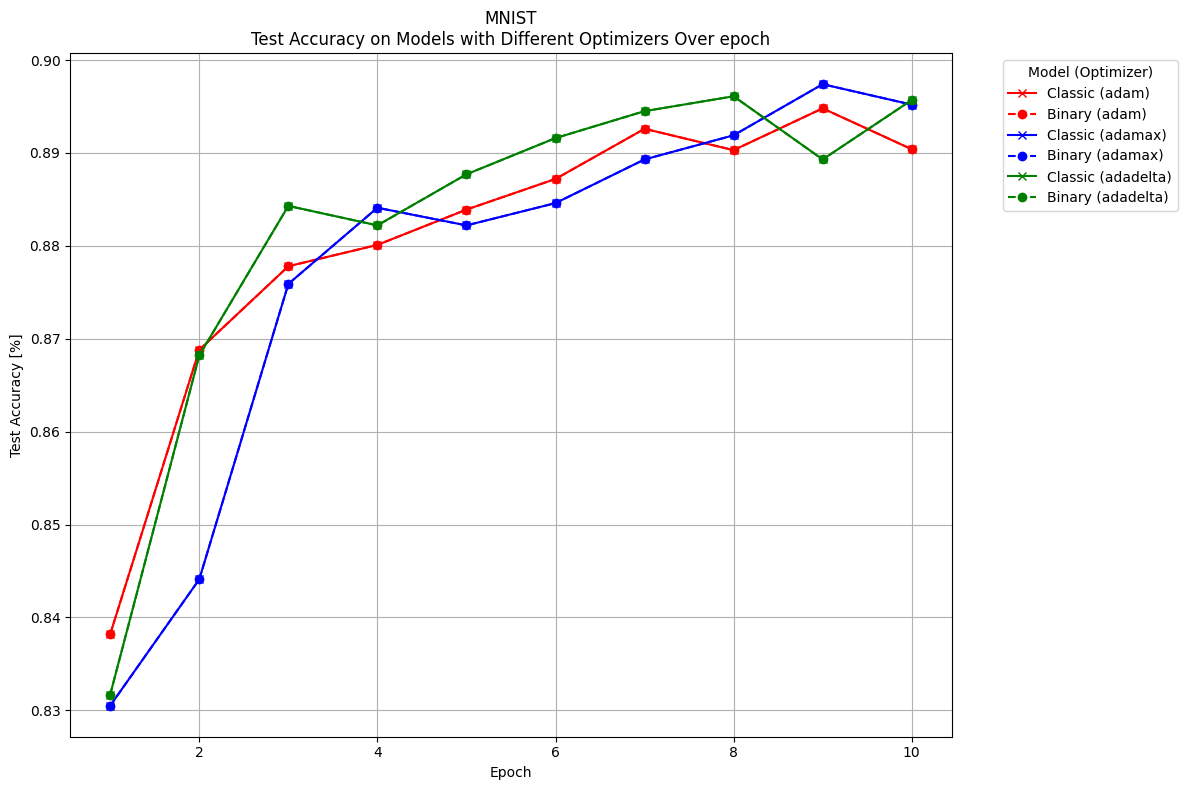

['Classic' 'Binary']


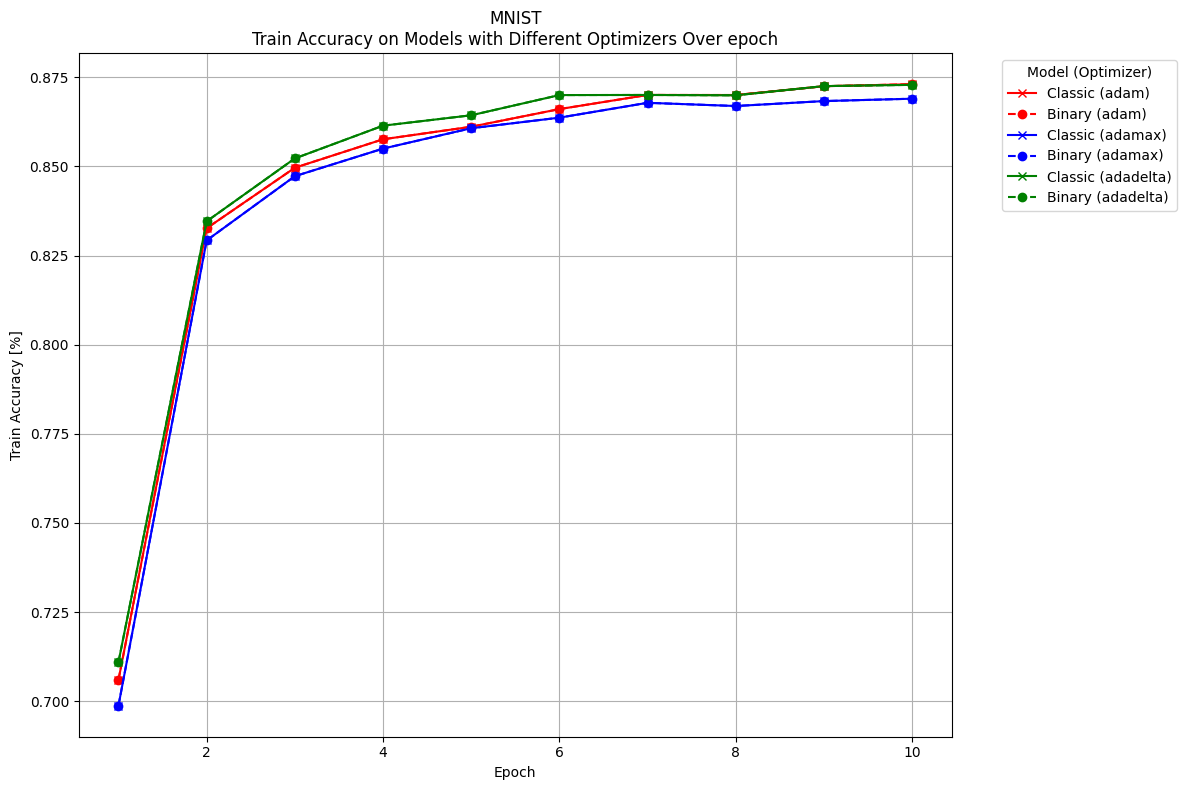

In [13]:
plot_models_optimizers(df, "MNIST", "epoch", "Test Accuracy", y_unit="[%]")
plot_models_optimizers(df, "MNIST", "epoch", "Train Accuracy", y_unit="[%]")


['Classic' 'Binary']


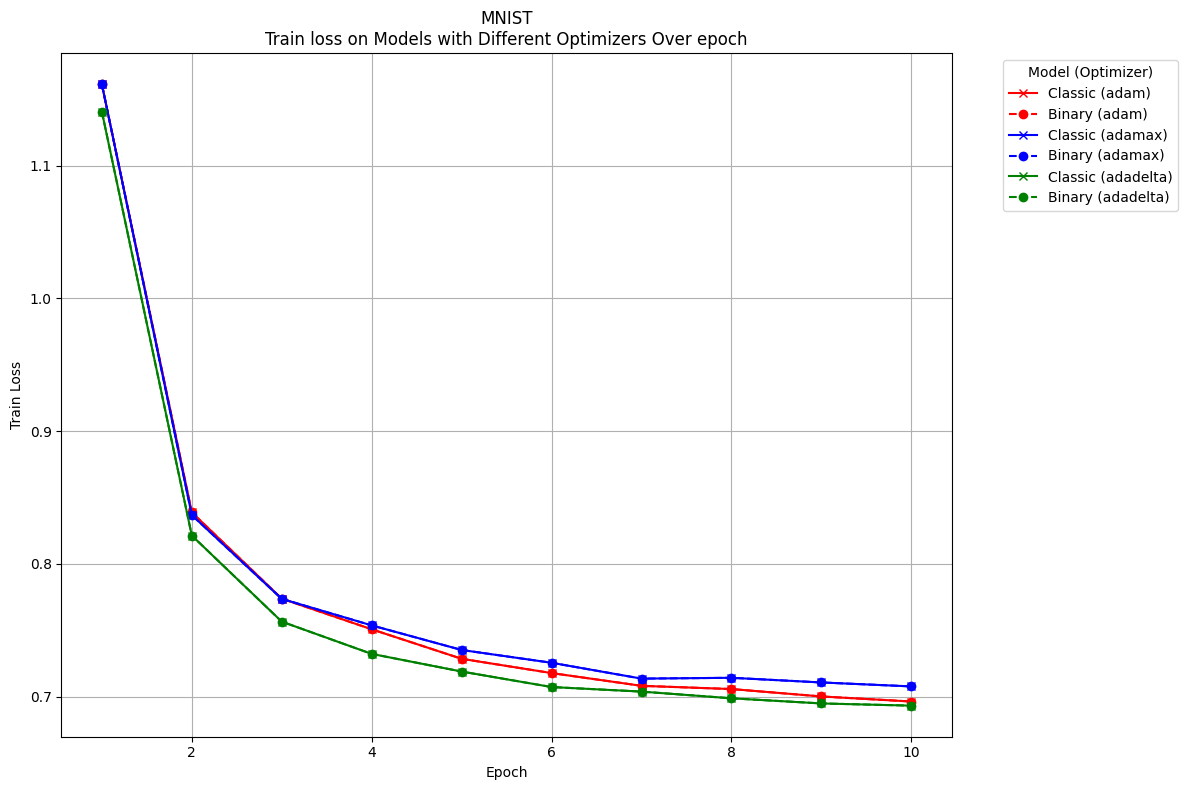

In [14]:
plot_models_optimizers(df, "MNIST", "epoch", "Train loss")

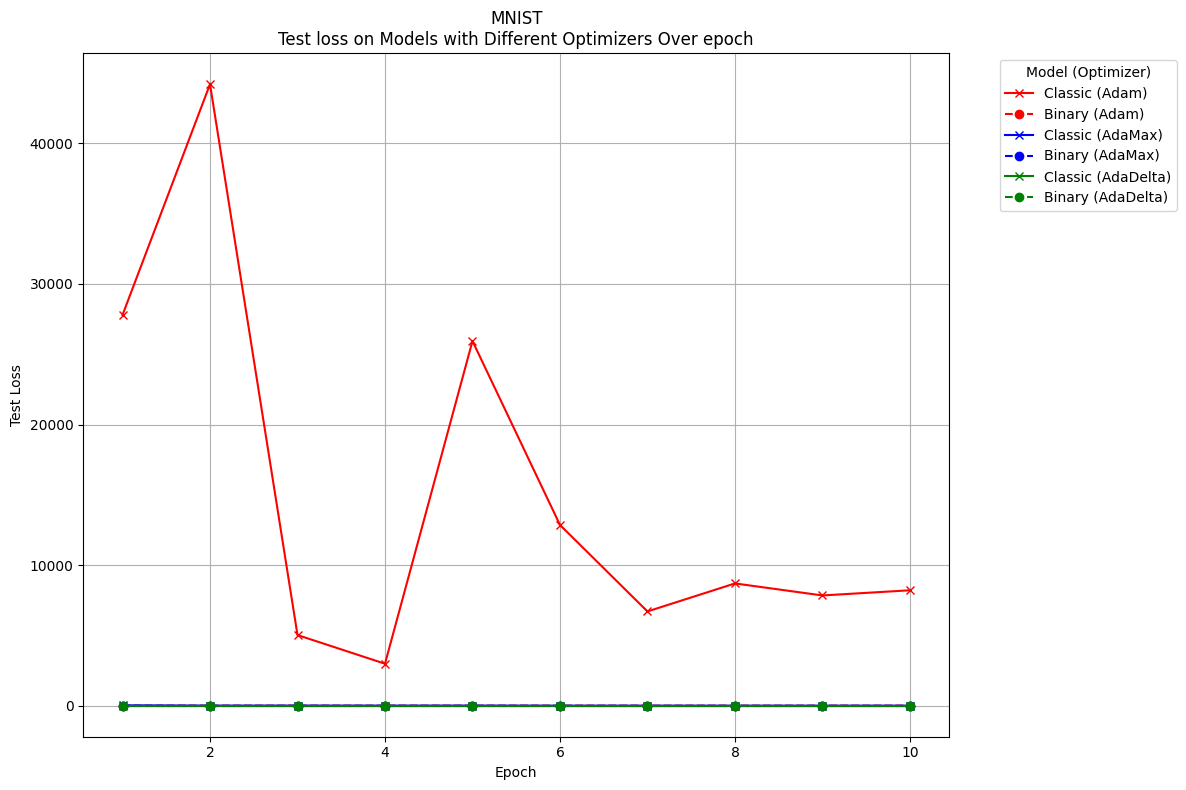

In [10]:
plot_models_optimizers(df, "MNIST", "epoch", "Test loss")

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

time_df = pd.read_csv('./log/mnist_times.txt')

In [2]:
time_df

,model,opitmizer,time
0,bimlp,adadelta,50.70
1,bimlp,adam,47.97
2,bimlp,adamax,49.16
3,mlp,adadelta,47.66
4,mlp,adam,46.99
5,mlp,adamax,49.04


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

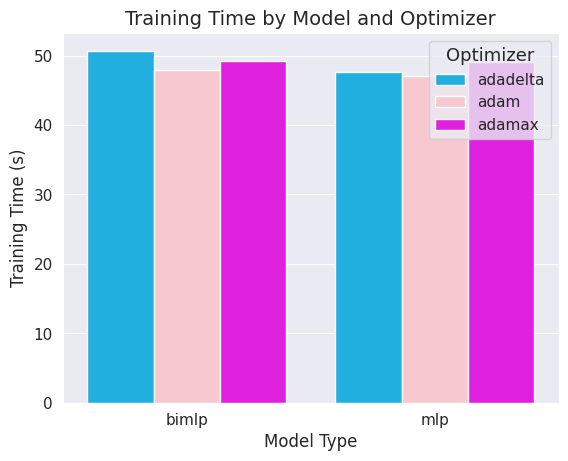

In [14]:
palette = {
    'adamax': 'fuchsia',
    'adadelta': 'deepskyblue',
    'adam': 'pink'
    
}

sns.barplot(time_df, x='model', y='time', hue='opitmizer', palette=palette)
# Add labels and title
plt.xlabel("Model Type", fontsize=12)
plt.ylabel("Training Time (s)", fontsize=12)
plt.title("Training Time by Model and Optimizer", fontsize=14)
plt.legend(title='Optimizer', title_fontsize='13', fontsize='11')
plt.grid
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

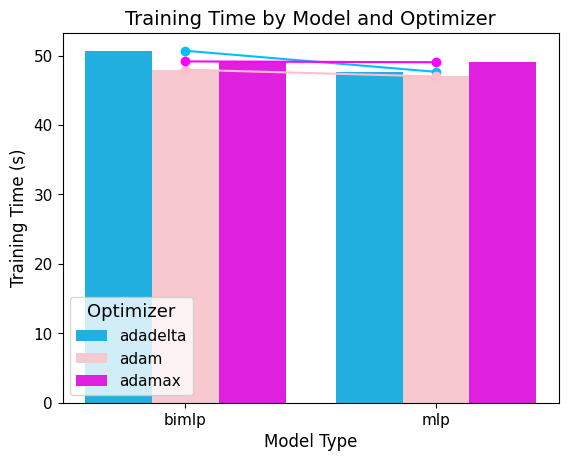

In [11]:

sns.barplot(data=time_df, x='model', y='time', hue='opitmizer', palette=palette)

# Add lines
for optimizer in time_df['opitmizer'].unique():
    subset = time_df[time_df['opitmizer'] == optimizer]
    plt.plot(subset['model'], subset['time'], marker='o', linestyle='-', color=palette[optimizer])

# Add labels and title
plt.xlabel("Model Type", fontsize=12)
plt.ylabel("Training Time (s)", fontsize=12)
plt.title("Training Time by Model and Optimizer", fontsize=14)
plt.legend(title='Optimizer', title_fontsize='13', fontsize='11')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)